In [1]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fftpack import dct, idct

Image dimensions: (450, 620, 3)


(-0.5, 619.5, 449.5, -0.5)

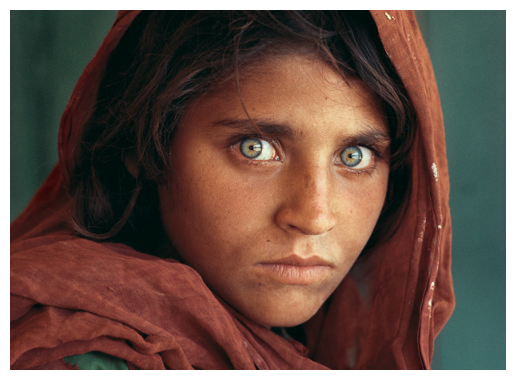

In [2]:
img = imread('afghan.jpg')

print('Image dimensions:', img.shape)

plt.figure()
plt.imshow(img)
plt.axis('off')

In [3]:
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')
               
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')

def dct_compression_rgb(img, threshold=0.1):
    compressed_channels = []
    for i in range(3):
        channel_dct = dct2(img[:, :, i])
        channel_sort = np.sort(np.abs(channel_dct.reshape(-1)))

        thresh = channel_sort[int(np.floor((1-threshold) * len(channel_sort)))]
        ind = np.abs(channel_dct) > thresh
        channel_compressed = channel_dct * ind
        channel_reconstructed = idct2(channel_compressed).real

        compressed_channels.append(channel_reconstructed)
    compressed_image = np.stack(compressed_channels, axis=-1)
    compressed_image = np.clip(compressed_image, 0, 255)
    
    return compressed_image


In [4]:
def fourier_compression(img, threshold=0.1):
    img_fft = np.fft.fft2(img)
    img_sort = np.sort(np.abs(img_fft.reshape(-1)))
    thresh = img_sort[int(np.floor((1-threshold)*len(img_sort)))]
    ind = np.abs(img_fft)>thresh
    img_compressed = img_fft * ind
    Alow = np.fft.ifft2(img_compressed).real
    return Alow

def compress(img_fft, threshold=0.1):
    img_sort = np.sort(np.abs(img_fft.reshape(-1)))
    thresh = img_sort[int(np.floor((1-threshold)*len(img_sort)))]
    ind = np.abs(img_fft)>thresh
    img_compressed = img_fft * ind
    Alow = np.fft.ifft2(img_compressed).real
    
def fft_compression_rgb(img, threshold=0.1):
    compressed_channels = []
    for i in range(3):
        channel_dct = np.fft.fft2(img[:, :, i])
        channel_sort = np.sort(np.abs(channel_dct.reshape(-1)))

        thresh = channel_sort[int(np.floor((1-threshold) * len(channel_sort)))]
        ind = np.abs(channel_dct) > thresh
        channel_compressed = channel_dct * ind
        channel_reconstructed = np.fft.ifft2(channel_compressed).real

        compressed_channels.append(channel_reconstructed)
    compressed_image = np.stack(compressed_channels, axis=-1)
    compressed_image = np.clip(compressed_image, 0, 255)
    
    return compressed_image

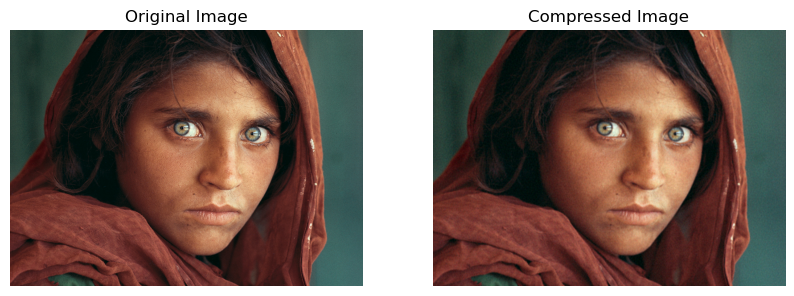

In [5]:
compressed_image_dct = dct_compression_rgb(img, threshold=0.1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image_dct.astype(np.uint8))
plt.title('Compressed Image')
plt.axis('off')
plt.show()

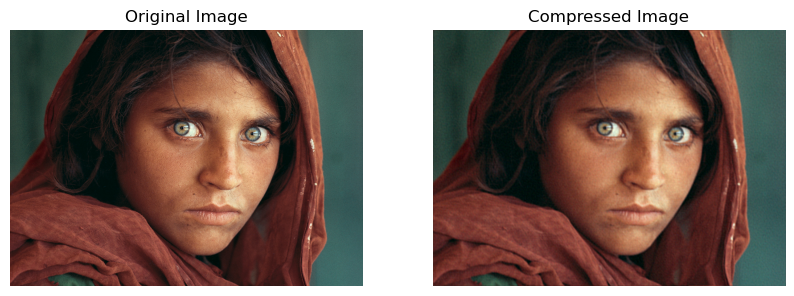

In [9]:
compressed_image_fft = fft_compression_rgb(img, threshold=0.1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image_fft.astype(np.uint8))
plt.title('Compressed Image')
plt.axis('off')
plt.show()